In [12]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Dropout
from tensorflow.keras.models import Model         #aiya agar apde jaate project banayo hoi to sequential use karvanu agar pre defined model used karta hoiye to Model use karvanu :)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import accuracy_score,classification_report

import matplotlib.pyplot as plt

In [13]:
Img_size = 224
Batch_size = 16
epochs = 10
num_classes = 4

train_dir = "C:/Users/ADMIN/Downloads/DATA SCIENCE COURSE/Deep Learning/Brain Tumor Detection/Dataset/Training"
test_dir = "C:/Users/ADMIN/Downloads/DATA SCIENCE COURSE/Deep Learning/Brain Tumor Detection/Dataset/Testing"

datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 20,
    zoom_range=0.2,
    horizontal_flip = True,
    validation_split = 0.2
)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size = (Img_size,Img_size),
    batch_size = Batch_size,
    class_mode = 'categorical',
    subset = 'training'
)

val_data = datagen.flow_from_directory(
    test_dir,
    target_size = (Img_size,Img_size),
    batch_size = Batch_size,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 4571 images belonging to 4 classes.
Found 262 images belonging to 4 classes.


In [14]:
test_datagen = ImageDataGenerator(
    rescale=1/255
)

In [15]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=Batch_size,
    class_mode = 'categorical'
)

Found 1311 images belonging to 4 classes.


In [48]:
base_model = MobileNetV2(
    weights='imagenet',
    include_top = False,
    input_shape = (224,224,3)
)

base_model.trainable = False

In [49]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)             # dense layer
output = Dense(4,activation='softmax')(x)       # apdi pase aiya 4 different classes che etle 4 avse 1 nai okayyyy

model = Model(inputs=base_model.input,outputs=output)

In [50]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [51]:
callbacks = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    mode='min'
)

In [53]:
tf.keras.models.load_model("C:/Users/ADMIN/Downloads/DATA SCIENCE COURSE/Deep Learning/Brain Tumor Detection/Best_models.keras")

<Functional name=functional_2, built=True>

In [56]:
history = model.fit(
    train_data,
    epochs = 3,
    validation_data = val_data,
    callbacks=callbacks
)

Epoch 1/3
286/286 ━━━━━━━━━━━━━━━━━━━━ 249s 869ms/step - accuracy: 0.9466 - loss: 0.1424 - val_accuracy: 0.8626 - val_loss: 0.5724
Epoch 2/3
286/286 ━━━━━━━━━━━━━━━━━━━━ 211s 737ms/step - accuracy: 0.9387 - loss: 0.1700 - val_accuracy: 0.8397 - val_loss: 0.5486
Epoch 3/3
286/286 ━━━━━━━━━━━━━━━━━━━━ 220s 768ms/step - accuracy: 0.9514 - loss: 0.1301 - val_accuracy: 0.8779 - val_loss: 0.4857


In [57]:
loss ,accuracy1 = model.evaluate(val_data)
print(f"MobileNetV2 accuracy is: {accuracy1}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 786ms/step - accuracy: 0.8511 - loss: 0.4912
MobileNetV2 accuracy is: 0.8511450290679932


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Following image of Brain tumor MRI belongs to the class:meningioma


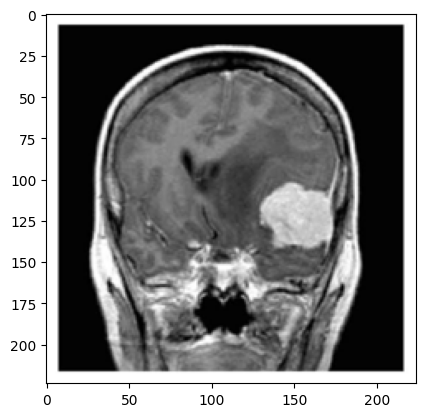

In [25]:
import tensorflow as tf
from PIL import Image
import numpy as np

class_names = ["glioma","meningioma","No Tumor :)","Pituitary"]
image_path = "C:/Users/ADMIN/Downloads/DATA SCIENCE COURSE/Deep Learning/Brain Tumor Detection/Dataset/Testing/meningioma/Te-me_0014.jpg"
image = Image.open(image_path).convert("RGB")

image = image.resize((224,224))
image_array = np.array(image)/255
image_array = np.expand_dims(image_array,axis=0)

prediction = model.predict(image_array)
prediction_index = np.argmax(prediction)
prediction_class = class_names[prediction_index]

print(f"Following image of Brain tumor MRI belongs to the class:{prediction_class}")

plt.imshow(image)
# plt.axes("off")
plt.show()


In [59]:
model.save("C:/Users/ADMIN/Downloads/DATA SCIENCE COURSE/Deep Learning/Best_models.keras")

#### ResNet

In [10]:
from tensorflow.keras.applications import ResNet50V2

base_model2 = ResNet50V2(
    input_shape=(224,224,3),
    weights='imagenet',
    include_top=False
)

base_model2.trainable = False

In [11]:
x = base_model2.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
output = Dense(4,activation='softmax')(x)

model2 = Model(inputs=base_model2.input,outputs=output)

In [12]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
tf.keras.models.load_model("C:/Users/ADMIN/Downloads/DATA SCIENCE COURSE/Deep Learning/Brain Tumor Detection/Best_ResNet.keras")

<Functional name=functional_3, built=True>

In [16]:
h2 = model2.fit(
    train_data,
    epochs=2,
    callbacks = callbacks,
    validation_data = val_data
)

Epoch 1/2
286/286 ━━━━━━━━━━━━━━━━━━━━ 604s 2s/step - accuracy: 0.8359 - loss: 0.4454 - val_accuracy: 0.7977 - val_loss: 0.5977
Epoch 2/2
286/286 ━━━━━━━━━━━━━━━━━━━━ 621s 2s/step - accuracy: 0.8981 - loss: 0.2744 - val_accuracy: 0.7405 - val_loss: 0.9185


In [28]:
loss , accuracy = model2.evaluate(test_data)
print(f"Accuracy from ResNetV2 is: {accuracy}")

82/82 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8566 - loss: 0.4039
Accuracy from ResNetV2 is: 0.8565980195999146


In [18]:
model2.save("C:/Users/ADMIN/Downloads/DATA SCIENCE COURSE/Deep Learning/Brain Tumor Detection/Best_ResNet.keras")

In [29]:
print(f"Accuracy of MobileNetV2 is: {accuracy1}")
print(f"Accuracy of ResNetV2 is: {accuracy}")

Accuracy of MobileNetV2 is: 0.8358778357505798
Accuracy of ResNetV2 is: 0.8565980195999146


In [ ]:
from tensorflow.keras.applications import VGG16,VGG19
base_model3 = VGG19(
    weights = 'imagenet',
    include_top = False,
    input_shape = (224,224,3)
)
base_model3.trainable =False


In [24]:
x = base_model3.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
output3 = Dense(4,activation='softmax')(x)

model3 = Model(inputs=base_model3.input,outputs=output3)

In [27]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
h3 = model3.fit(
    train_data,
    epochs = 1,
    validation_data=val_data,
    callbacks = callbacks
)

286/286 ━━━━━━━━━━━━━━━━━━━━ 1796s 6s/step - accuracy: 0.8661 - loss: 0.3478 - val_accuracy: 0.6718 - val_loss: 0.9830


In [46]:
loss,accuracy = model3.evaluate(test_data)
print(f"Accuracy is : {accuracy}")

82/82 ━━━━━━━━━━━━━━━━━━━━ 479s 6s/step - accuracy: 0.8383 - loss: 0.4755
Accuracy is : 0.8382914066314697


In [47]:
model3.save("C:/Users/ADMIN/Downloads/DATA SCIENCE COURSE/Deep Learning/Brain Tumor Detection/VGG19.keras")